# Detecting Credit Card Fraud with Machine Learning

Authors : Immaculate, Joan, Bertha, James, John

## Overview

## Business Problem

## Objectives

## Business Questions

# Data Understanding

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from matplotlib.gridspec import GridSpec

In [44]:
df = pd.read_csv('credit_card_transactions.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [45]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0,59870.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [47]:
df.shape

(1296675, 24)

In [48]:
#stastical summary
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.682575e+04
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,2.583400e+04
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.001000e+03
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2.511400e+04
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.586000e+04
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.831900e+04
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.940300e+04


In [49]:
# Number of unique values per column
df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
merch_zipcode              28336
dtype: int64

In [50]:
print(df['category'].value_counts())

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64


In [51]:
print(df['gender'].value_counts())

F    709863
M    586812
Name: gender, dtype: int64


In [52]:
print(df['job'].value_counts())

Film/video editor                 9779
Exhibition designer               9199
Naval architect                   8684
Surveyor, land/geomatics          8680
Materials engineer                8270
                                  ... 
Information officer                  8
Armed forces technical officer       8
Warehouse manager                    7
Contracting civil engineer           7
Ship broker                          7
Name: job, Length: 494, dtype: int64


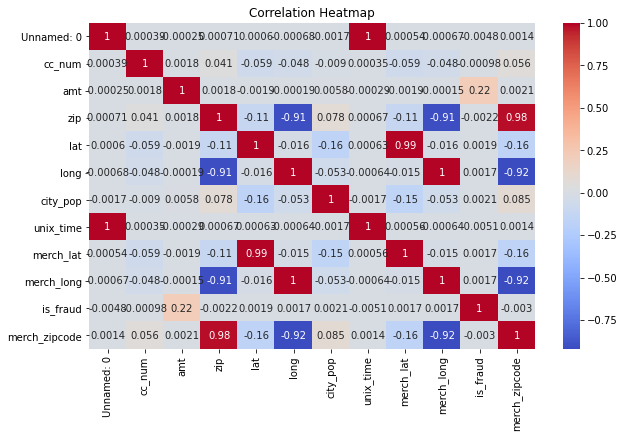

In [53]:
# Correlation matrix
correlation = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Transaction amount doesn't seem strongly linearly related to the other numerical features. 

Cardholder locations are correlated with each other, as are merchant locations, suggesting geographical patterns.

There's a weak tendency for transactions to happen somewhat near the cardholder's location. 

City population has a weak linear relationship with geographical coordinates and transaction amount

## Data Cleaning

In [54]:
#Check on missing values count
df.isnull().sum()

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64

In [55]:
#Check for duplicates
df.duplicated().sum()

0

In [56]:
total_cells = np.product(df.shape)
    
# Count of missing values
missing_count = df.isna().sum().sum()
    
# Calculate percentage
percentage_missing = (missing_count / total_cells) * 100

print(f"Percentage of missing values: {percentage_missing:.2f}%")

Percentage of missing values: 0.63%


In [57]:
# Drop the "Unnamed: 0" column, this is the row number
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
    print("Dropped the 'Unnamed: 0' column.")
else:
    print("The 'Unnamed: 0' column was not found.")

df.head()

Dropped the 'Unnamed: 0' column.


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [58]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [60]:
# Split trans_date_trans_time into date and time columns
df['trans_date'] = pd.to_datetime(df['trans_date_trans_time']).dt.date
df['trans_time'] = pd.to_datetime(df['trans_date_trans_time']).dt.time

df['trans_date'] = pd.to_datetime(df['trans_date'])
df['dob'] = pd.to_datetime(df['dob'])

In [61]:
df.drop(['trans_date_trans_time'], axis=1, inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   cc_num         1296675 non-null  int64         
 1   merchant       1296675 non-null  object        
 2   category       1296675 non-null  object        
 3   amt            1296675 non-null  float64       
 4   first          1296675 non-null  object        
 5   last           1296675 non-null  object        
 6   gender         1296675 non-null  object        
 7   street         1296675 non-null  object        
 8   city           1296675 non-null  object        
 9   state          1296675 non-null  object        
 10  zip            1296675 non-null  int64         
 11  lat            1296675 non-null  float64       
 12  long           1296675 non-null  float64       
 13  city_pop       1296675 non-null  int64         
 14  job            1296675 non-null  o

In [63]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.682575e+04
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,2.583400e+04
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.001000e+03
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2.511400e+04
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.586000e+04
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.831900e+04
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.940300e+04


In [64]:
df.isnull().sum()

cc_num                0
merchant              0
category              0
amt                   0
first                 0
last                  0
gender                0
street                0
city                  0
state                 0
zip                   0
lat                   0
long                  0
city_pop              0
job                   0
dob                   0
trans_num             0
unix_time             0
merch_lat             0
merch_long            0
is_fraud              0
merch_zipcode    195973
trans_date            0
trans_time            0
dtype: int64

In [65]:
# Function to fill missing zipcodes using nearest coordinates
def fill_missing_zipcodes_nearest_neighbor(df):
    # Create a copy to avoid modifying the original dataframe
    df_filled = df.copy()
    
    # Separate rows with and without zipcodes
    df_with_zip = df[df['merch_zipcode'].notna()]
    df_missing_zip = df[df['merch_zipcode'].isna()]
    
    if len(df_with_zip) == 0:
        print("No existing zipcodes to use as reference.")
        return df
    
    if len(df_missing_zip) == 0:
        print("No missing zipcodes to fill.")
        return df
    
    # Features for matching (latitude and longitude)
    X_reference = df_with_zip[['merch_lat', 'merch_long']].values
    X_missing = df_missing_zip[['merch_lat', 'merch_long']].values
    
    # Train nearest neighbors model
    print(f"Training model on {len(X_reference)} reference points...")
    nn_model = NearestNeighbors(n_neighbors=1)
    nn_model.fit(X_reference)
    
    # Find nearest neighbor for each missing point
    print(f"Finding nearest neighbors for {len(X_missing)} missing values...")
    distances, indices = nn_model.kneighbors(X_missing)
    
    # Get corresponding zipcodes from nearest neighbors
    nearest_zipcodes = df_with_zip.iloc[indices.flatten()]['merch_zipcode'].values
    
    # Fill missing zipcodes with nearest neighbor values
    df_filled.loc[df_missing_zip.index, 'merch_zipcode'] = nearest_zipcodes
    
    # Show some statistics on the distances
    print(f"Average distance to nearest neighbor: {distances.mean():.6f}")
    print(f"Maximum distance to nearest neighbor: {distances.max():.6f}")
    
    return df_filled

# Use the function to fill missing zipcodes
df = fill_missing_zipcodes_nearest_neighbor(df)

# Print results
print(f"Missing zipcodes before: {df['merch_zipcode'].isna().sum()}")
print(f"Missing zipcodes after: {df['merch_zipcode'].isna().sum()}")


Training model on 1100702 reference points...
Finding nearest neighbors for 195973 missing values...
Average distance to nearest neighbor: 0.668694
Maximum distance to nearest neighbor: 45.876802
Missing zipcodes before: 0
Missing zipcodes after: 0


In [42]:
df.isnull().sum()

cc_num           0
merchant         0
category         0
amt              0
first            0
last             0
gender           0
street           0
city             0
state            0
zip              0
lat              0
long             0
city_pop         0
job              0
dob              0
trans_num        0
unix_time        0
merch_lat        0
merch_long       0
is_fraud         0
merch_zipcode    0
trans_date       0
trans_time       0
dtype: int64

## Visualization

<Figure size 864x720 with 0 Axes>

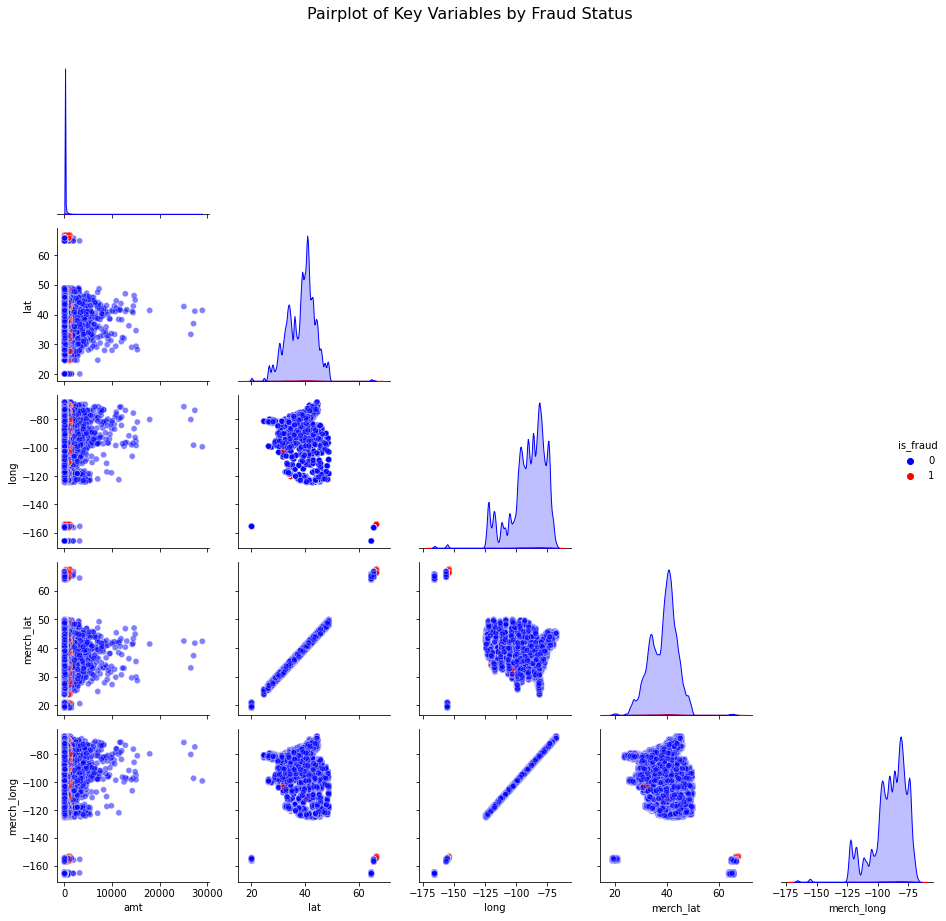

In [155]:
relevant_cols = ['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'is_fraud']

# Create a pairplot with hue based on fraud status
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(
    df[relevant_cols], 
    hue='is_fraud',              # Color by fraud status
    palette=['blue', 'red'],     # Blue for non-fraud, red for fraud
    corner=True,                 # Show only the lower triangle to reduce redundancy
    plot_kws={'alpha': 0.5},     # Add transparency to see overlapping points
    diag_kind='kde'              # Use kernel density plots on the diagonal
)

pairplot.fig.suptitle('Pairplot of Key Variables by Fraud Status', y=1.02, fontsize=16)

plt.tight_layout()
plt.show()

The pair plot reveals the individual distributions of the numerical features and their pairwise relationships. 

Transaction amounts are heavily skewed towards smaller values. Cardholder and merchant locations exhibit geographical clustering. 

There's a weak indication of local shopping. 

Importantly, the transaction amount doesn't show a strong linear relationship with location or city population within this visualization.

In [66]:
# Descriptive statistics for numerical features
print("\nDescriptive Statistics for Numerical Features:")
df[['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']].describe()


Descriptive Statistics for Numerical Features:


,amt,city_pop,lat,long,merch_lat,merch_long
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,8.882444e+04,3.853762e+01,-9.022634e+01,3.853734e+01,-9.022646e+01
std,1.603160e+02,3.019564e+05,5.075808e+00,1.375908e+01,5.109788e+00,1.377109e+01
min,1.000000e+00,2.300000e+01,2.002710e+01,-1.656723e+02,1.902779e+01,-1.666712e+02
25%,9.650000e+00,7.430000e+02,3.462050e+01,-9.679800e+01,3.473357e+01,-9.689728e+01
50%,4.752000e+01,2.456000e+03,3.935430e+01,-8.747690e+01,3.936568e+01,-8.743839e+01
75%,8.314000e+01,2.032800e+04,4.194040e+01,-8.015800e+01,4.195716e+01,-8.023680e+01
max,2.894890e+04,2.906700e+06,6.669330e+01,-6.795030e+01,6.751027e+01,-6.695090e+01


In [67]:
# Value counts for categorical features
print("\nValue Counts for Categorical Features (Top 20):")
for col in ['category', 'gender', 'state', 'job', 'merchant']:
    print(f"\nValue counts for column '{col}':")
    print(df[col].value_counts().head(20))


Value Counts for Categorical Features (Top 20):

Value counts for column 'category':
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

Value counts for column 'gender':
F    709863
M    586812
Name: gender, dtype: int64

Value counts for column 'state':
TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
Name: state, dtype: int64

Value counts for column 'job':
Film/video editor                      9779
Exhibition designer                    9199
Naval architect              

In [68]:
# Distribution of transaction dates
print("\nTransaction Date Range:")
print(f"Min Transaction Date: {df['trans_date'].min()}")
print(f"Max Transaction Date: {df['trans_date'].max()}")

print("\nDistribution of Transaction Years:")
df['trans_date_fixed'] = df['trans_date'].copy()
print(df['trans_date_fixed'].dt.year.value_counts().sort_index())

# Distribution of birth years
print("\nDistribution of Birth Years:")
print(df['dob'].dt.year.value_counts().sort_index().head())


Transaction Date Range:
Min Transaction Date: 2019-01-01 00:00:00
Max Transaction Date: 2020-06-21 00:00:00

Distribution of Transaction Years:
2019    924850
2020    371825
Name: trans_date_fixed, dtype: int64

Distribution of Birth Years:
1924     536
1925      11
1926    6063
1927    4645
1928    4131
Name: dob, dtype: int64


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   cc_num            1296675 non-null  int64         
 1   merchant          1296675 non-null  object        
 2   category          1296675 non-null  object        
 3   amt               1296675 non-null  float64       
 4   first             1296675 non-null  object        
 5   last              1296675 non-null  object        
 6   gender            1296675 non-null  object        
 7   street            1296675 non-null  object        
 8   city              1296675 non-null  object        
 9   state             1296675 non-null  object        
 10  zip               1296675 non-null  int64         
 11  lat               1296675 non-null  float64       
 12  long              1296675 non-null  float64       
 13  city_pop          1296675 non-null  int64 

Text(0, 0.5, 'Count (log scale)')

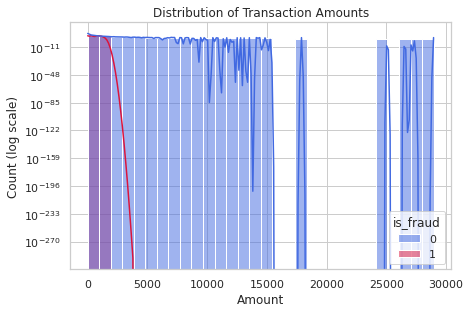

In [73]:
# Set the style for better visualizations
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Create a color palette for fraud vs non-fraud
fraud_palette = {0: 'royalblue', 1: 'crimson'}
fraud_labels = {0: 'Legitimate', 1: 'Fraudulent'}

# Transaction Amount Distribution
plt.figure(figsize=(15, 10))
gs = GridSpec(2, 2)

# Histogram of transaction amounts with log scale
plt.subplot(gs[0, 0])
sns.histplot(data=df, x='amt', hue='is_fraud', palette=fraud_palette, 
            bins=30, kde=True, log_scale=(False, True))
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Count (log scale)')


([<matplotlib.axis.XTick at 0x7b7d1c6042b0>,
 [Text(0, 0, 'Legitimate'), Text(1, 0, 'Fraudulent')])

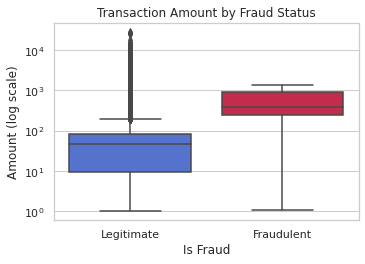

In [74]:
# Boxplot of transaction amounts
plt.subplot(gs[0, 1])
sns.boxplot(data=df, x='is_fraud', y='amt', palette=fraud_palette)
plt.title('Transaction Amount by Fraud Status')
plt.yscale('log')  # Log scale for better visualization
plt.xlabel('Is Fraud')
plt.ylabel('Amount (log scale)')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])


([<matplotlib.axis.XTick at 0x7b7cd44209a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

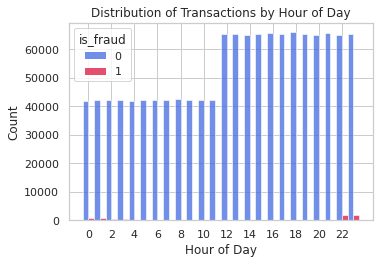

In [75]:
# Hour of day distribution
df['hour'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S').dt.hour
plt.subplot(gs[1, 0])
sns.histplot(data=df, x='hour', hue='is_fraud', palette=fraud_palette, 
             bins=24, discrete=True, multiple='dodge')
plt.title('Distribution of Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(range(0, 24, 2))


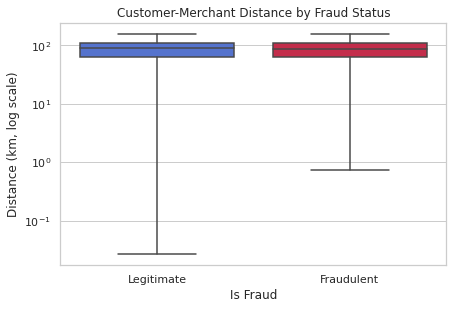

In [76]:
# Calculate customer-merchant distance
df['distance'] = np.sqrt((df['lat'] - df['merch_lat'])**2 + 
                         (df['long'] - df['merch_long'])**2) * 111  # rough km conversion

# Boxplot of customer-merchant distance
plt.subplot(gs[1, 1])
sns.boxplot(data=df, x='is_fraud', y='distance', palette=fraud_palette)
plt.title('Customer-Merchant Distance by Fraud Status')
plt.yscale('log')  # Log scale for better visualization
plt.xlabel('Is Fraud')
plt.ylabel('Distance (km, log scale)')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])

plt.tight_layout()
plt.savefig('distribution_plots.png', dpi=300, bbox_inches='tight')
plt.show()


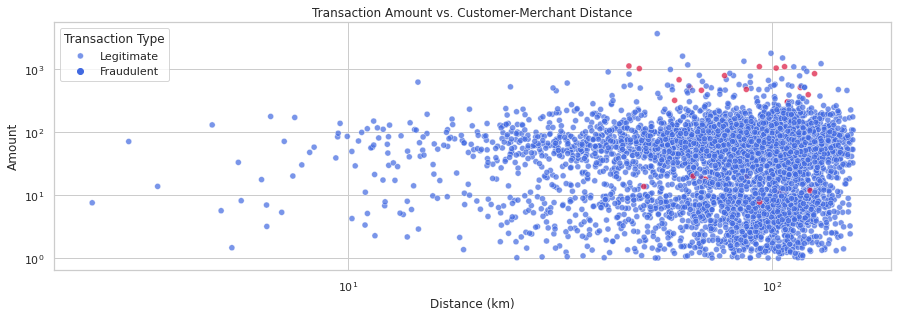

In [77]:
plt.figure(figsize=(15, 10))
gs = GridSpec(2, 2)

# Amount vs Distance scatter plot
plt.subplot(gs[0, :])
sns.scatterplot(data=df.sample(min(5000, len(df))), x='distance', y='amt', 
                hue='is_fraud', palette=fraud_palette, alpha=0.7)
plt.title('Transaction Amount vs. Customer-Merchant Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Amount')
plt.yscale('log')
plt.xscale('log')
plt.legend(title='Transaction Type', labels=['Legitimate', 'Fraudulent'])


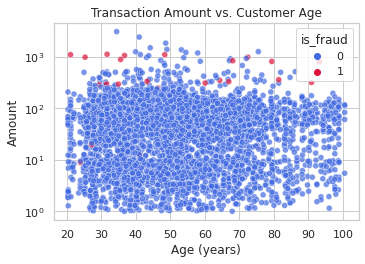

In [78]:
# Age calculation
df['age'] = (pd.to_datetime('today') - pd.to_datetime(df['dob'])).dt.days / 365.25

# Amount vs Age scatter plot
plt.subplot(gs[1, 0])
sns.scatterplot(data=df.sample(min(5000, len(df))), x='age', y='amt', 
                hue='is_fraud', palette=fraud_palette, alpha=0.7)
plt.title('Transaction Amount vs. Customer Age')
plt.xlabel('Age (years)')
plt.ylabel('Amount')
plt.yscale('log')


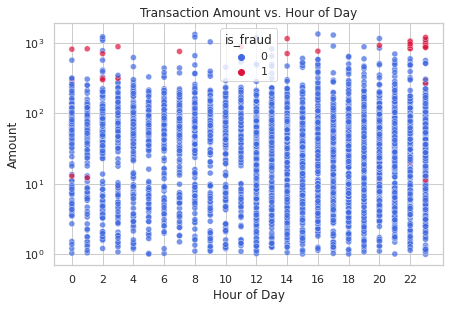

In [79]:
# Hour vs Amount scatter plot
plt.subplot(gs[1, 1])
sns.scatterplot(data=df.sample(min(5000, len(df))), x='hour', y='amt', 
                hue='is_fraud', palette=fraud_palette, alpha=0.7)
plt.title('Transaction Amount vs. Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Amount')
plt.yscale('log')
plt.xticks(range(0, 24, 2))

plt.tight_layout()
plt.savefig('relationship_plots.png', dpi=300, bbox_inches='tight')
plt.show()


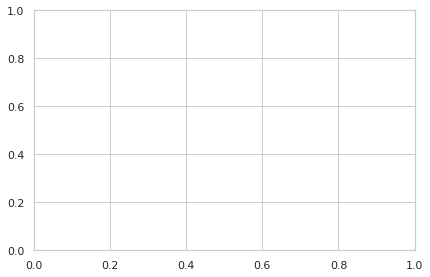

In [80]:
plt.figure(figsize=(15, 15))
gs = GridSpec(3, 2)

# Category distribution
plt.subplot(gs[0, 0])
category_counts = df.groupby(['category', 'is_fraud']).size().unstack().fillna(0)
category_counts_pct = category_counts.div(category_counts.sum(axis=1), axis=0) * 100


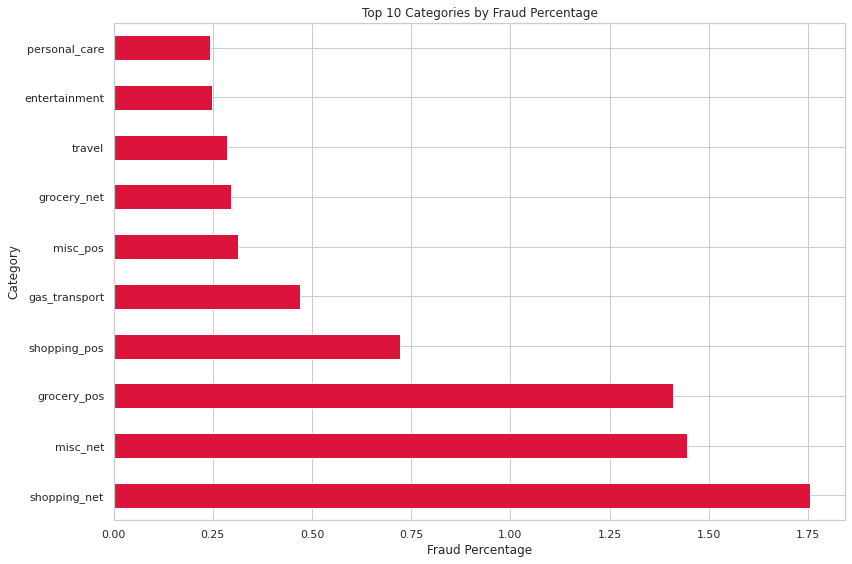

In [81]:
# Sort by fraud percentage
fraud_pct = category_counts_pct[1].sort_values(ascending=False)
top_categories = fraud_pct.head(10).index

# Plot top categories by fraud percentage
fraud_pct_top = fraud_pct[fraud_pct.index.isin(top_categories)]
ax = fraud_pct_top.plot(kind='barh', color='crimson')
plt.title('Top 10 Categories by Fraud Percentage')
plt.xlabel('Fraud Percentage')
plt.ylabel('Category')
plt.tight_layout()


(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

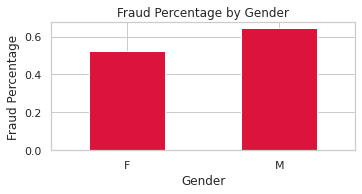

In [82]:
# Gender distribution
plt.subplot(gs[0, 1])
gender_fraud = df.groupby(['gender', 'is_fraud']).size().unstack().fillna(0)
gender_fraud_pct = gender_fraud.div(gender_fraud.sum(axis=1), axis=0) * 100
gender_fraud_pct[1].plot(kind='bar', color='crimson')
plt.title('Fraud Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Fraud Percentage')
plt.xticks(rotation=0)


Text(0, 0.5, 'State')

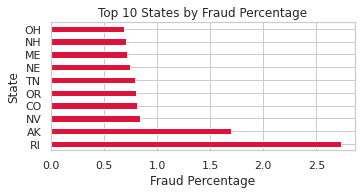

In [83]:
# State distribution (top 10 states by fraud rate)
plt.subplot(gs[1, 0])
state_fraud = df.groupby(['state', 'is_fraud']).size().unstack().fillna(0)
state_fraud_pct = state_fraud.div(state_fraud.sum(axis=1), axis=0) * 100
state_fraud_pct = state_fraud_pct[state_fraud.sum(axis=1) > 50]  # Only states with sufficient data
top_fraud_states = state_fraud_pct[1].sort_values(ascending=False).head(10)
top_fraud_states.plot(kind='barh', color='crimson')
plt.title('Top 10 States by Fraud Percentage')
plt.xlabel('Fraud Percentage')
plt.ylabel('State')


([<matplotlib.axis.XTick at 0x7b7cd3ef5190>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

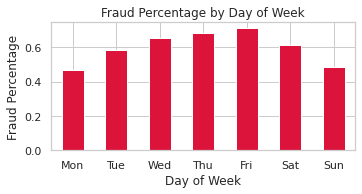

In [84]:
# Add day of week analysis
plt.subplot(gs[1, 1])
df['day_of_week'] = df['trans_date'].dt.dayofweek
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_fraud = df.groupby(['day_of_week', 'is_fraud']).size().unstack().fillna(0)
day_fraud_pct = day_fraud.div(day_fraud.sum(axis=1), axis=0) * 100
day_fraud_pct[1].plot(kind='bar', color='crimson')
plt.title('Fraud Percentage by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Fraud Percentage')
plt.xticks(range(7), day_names, rotation=0)


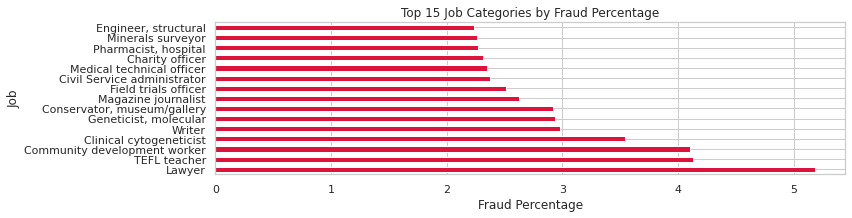

In [85]:
# Job category analysis
plt.subplot(gs[2, :])
job_fraud = df.groupby(['job', 'is_fraud']).size().unstack().fillna(0)
job_fraud = job_fraud[job_fraud.sum(axis=1) > 30]  # Filter jobs with enough data
job_fraud_pct = job_fraud.div(job_fraud.sum(axis=1), axis=0) * 100
top_fraud_jobs = job_fraud_pct[1].sort_values(ascending=False).head(15)
top_fraud_jobs.plot(kind='barh', color='crimson')
plt.title('Top 15 Job Categories by Fraud Percentage')
plt.xlabel('Fraud Percentage')
plt.ylabel('Job')

plt.tight_layout()
plt.savefig('categorical_plots.png', dpi=300, bbox_inches='tight')
plt.show()


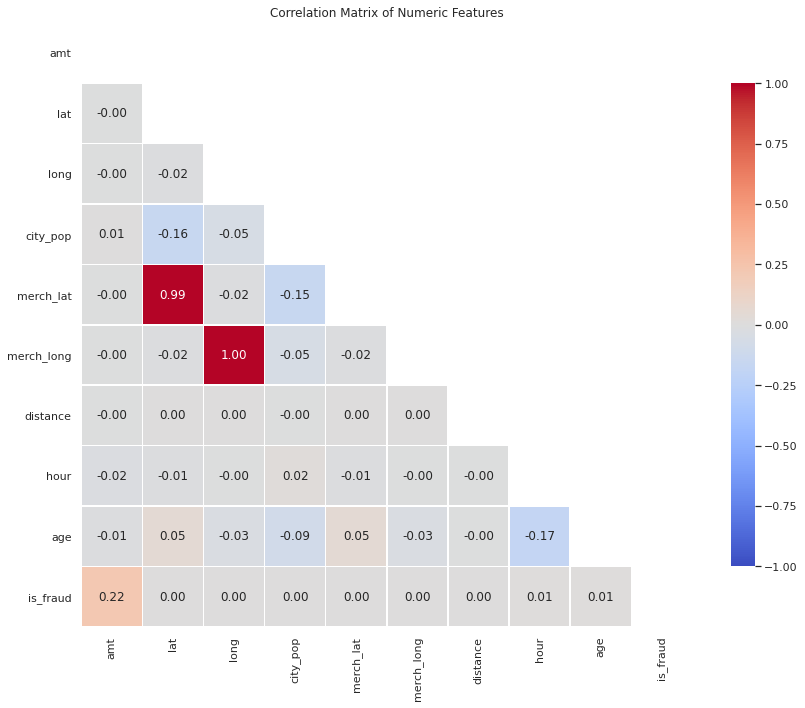

In [86]:
# Select numeric columns for correlation
numeric_cols = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 
                'distance', 'hour', 'age', 'is_fraud']
corr_df = df[numeric_cols].copy()

# Calculate correlation matrix
correlation = corr_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            mask=mask, vmin=-1, vmax=1, center=0, linewidths=.5,
            cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0-50'),
  Text(1, 0, '50-100'),
  Text(2, 0, '100-500'),
  Text(3, 0, '500-1000'),
  Text(4, 0, '1K-5K'),
  Text(5, 0, '5K+')])

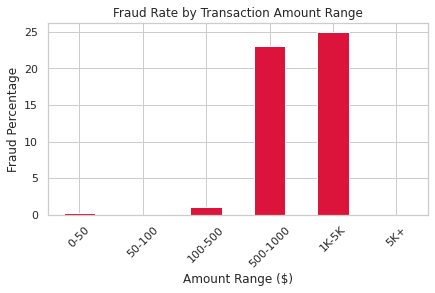

In [87]:
#FRAUD INSIGHTS

plt.figure(figsize=(15, 12))
gs = GridSpec(3, 2)

# 1. Fraud rate by amount range
plt.subplot(gs[0, 0])
df['amount_bin'] = pd.cut(df['amt'], bins=[0, 50, 100, 500, 1000, 5000, float('inf')],
                          labels=['0-50', '50-100', '100-500', '500-1000', '1K-5K', '5K+'])
amt_bin_fraud = df.groupby(['amount_bin', 'is_fraud']).size().unstack().fillna(0)
amt_bin_fraud_pct = amt_bin_fraud.div(amt_bin_fraud.sum(axis=1), axis=0) * 100
amt_bin_fraud_pct[1].plot(kind='bar', color='crimson')
plt.title('Fraud Rate by Transaction Amount Range')
plt.xlabel('Amount Range ($)')
plt.ylabel('Fraud Percentage')
plt.xticks(rotation=45)


([<matplotlib.axis.YTick at 0x7b7cd3cb93a0>,
 [Text(0, 0.5, 'Mon'),
  Text(0, 1.5, 'Tue'),
  Text(0, 2.5, 'Wed'),
  Text(0, 3.5, 'Thu'),
  Text(0, 4.5, 'Fri'),
  Text(0, 5.5, 'Sat'),
  Text(0, 6.5, 'Sun')])

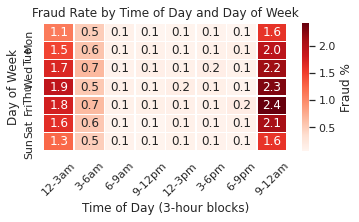

In [88]:
# 2. Fraud by time of day (heatmap)
plt.subplot(gs[0, 1])
df['hour_bin'] = df['hour'] // 3  # Group hours into 3-hour bins
df['weekday'] = df['day_of_week']
time_fraud = df.pivot_table(index='weekday', columns='hour_bin', 
                           values='is_fraud', aggfunc='mean') * 100
sns.heatmap(time_fraud, annot=True, fmt='.1f', cmap='Reds', 
            linewidths=.5, cbar_kws={"label": "Fraud %"})
plt.title('Fraud Rate by Time of Day and Day of Week')
plt.xlabel('Time of Day (3-hour blocks)')
plt.ylabel('Day of Week')
hour_labels = ['12-3am', '3-6am', '6-9am', '9-12pm', '12-3pm', '3-6pm', '6-9pm', '9-12am']
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(np.arange(len(hour_labels)) + 0.5, hour_labels, rotation=45)
plt.yticks(np.arange(len(day_labels)) + 0.5, day_labels)


([<matplotlib.axis.XTick at 0x7b7cd3baa070>,
 [Text(0, 0, 'Legitimate'), Text(1, 0, 'Fraudulent')])

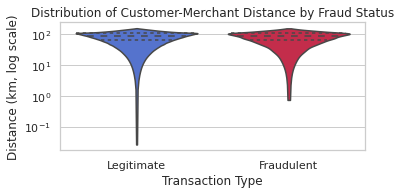

In [89]:
# 3. Distance comparison violin plot
plt.subplot(gs[1, 0])
sns.violinplot(data=df, x='is_fraud', y='distance', palette=fraud_palette, cut=0,
              scale='width', inner='quartile')
plt.title('Distribution of Customer-Merchant Distance by Fraud Status')
plt.yscale('log')
plt.xlabel('Transaction Type')
plt.ylabel('Distance (km, log scale)')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'grocery_pos'),
  Text(1, 0, 'gas_transport'),
  Text(2, 0, 'shopping_pos'),
  Text(3, 0, 'kids_pets'),
  Text(4, 0, 'home')])

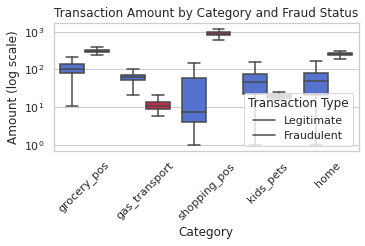

In [90]:
# 4. Amount by Category and Fraud boxplot
plt.subplot(gs[1, 1])
top_5_categories = df['category'].value_counts().head(5).index
category_subset = df[df['category'].isin(top_5_categories)].copy()
sns.boxplot(data=category_subset, x='category', y='amt', hue='is_fraud', 
           palette=fraud_palette, showfliers=False)
plt.title('Transaction Amount by Category and Fraud Status')
plt.yscale('log')
plt.xlabel('Category')
plt.ylabel('Amount (log scale)')
plt.legend(title='Transaction Type', labels=['Legitimate', 'Fraudulent'])
plt.xticks(rotation=45)


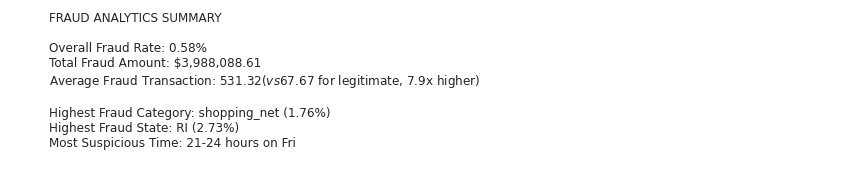

In [92]:
# 5. Fraud detection summary metrics
plt.subplot(gs[2, :])

# Recalculate category fraud percentages for this scope
category_fraud = df.groupby(['category', 'is_fraud']).size().unstack().fillna(0)
category_fraud_pct = category_fraud.div(category_fraud.sum(axis=1), axis=0) * 100

# Recalculate state fraud percentages for this scope
state_fraud = df.groupby(['state', 'is_fraud']).size().unstack().fillna(0)
state_fraud_pct = state_fraud.div(state_fraud.sum(axis=1), axis=0) * 100
state_fraud_pct = state_fraud_pct[state_fraud.sum(axis=1) > 50]  # Only states with sufficient data

# Create text summary of key fraud insights
fraud_rate = df['is_fraud'].mean() * 100
total_fraud_amount = df.loc[df['is_fraud'] == 1, 'amt'].sum()
avg_fraud_amount = df.loc[df['is_fraud'] == 1, 'amt'].mean()
avg_normal_amount = df.loc[df['is_fraud'] == 0, 'amt'].mean()
amount_ratio = avg_fraud_amount / avg_normal_amount
worst_category = category_fraud_pct[1].idxmax()
worst_category_rate = category_fraud_pct[1].max()
worst_state = state_fraud_pct[1].idxmax()
worst_state_rate = state_fraud_pct[1].max()

# Make sure day_labels is defined in this scope
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Recalculate time fraud for this scope if it's not available
if 'time_fraud' not in locals() or 'time_fraud' not in globals():
    df['hour_bin'] = df['hour'] // 3  # Group hours into 3-hour bins
    df['weekday'] = df['day_of_week']
    time_fraud = df.pivot_table(index='weekday', columns='hour_bin', 
                              values='is_fraud', aggfunc='mean') * 100

text = (
    f"FRAUD ANALYTICS SUMMARY\n\n"
    f"Overall Fraud Rate: {fraud_rate:.2f}%\n"
    f"Total Fraud Amount: ${total_fraud_amount:,.2f}\n"
    f"Average Fraud Transaction: ${avg_fraud_amount:.2f} "
    f"(vs ${avg_normal_amount:.2f} for legitimate, {amount_ratio:.1f}x higher)\n\n"
    f"Highest Fraud Category: {worst_category} ({worst_category_rate:.2f}%)\n"
    f"Highest Fraud State: {worst_state} ({worst_state_rate:.2f}%)\n"
    f"Most Suspicious Time: {time_fraud.stack().idxmax()[1]*3}-{time_fraud.stack().idxmax()[1]*3+3} hours "
    f"on {day_labels[time_fraud.stack().idxmax()[0]]}\n"
)

plt.axis('off')
plt.text(0.05, 0.5, text, fontsize=12, va='center')
plt.tight_layout()
plt.savefig('fraud_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()